## In this Notebook, we will work on **Breast Cancer** dataset. 
> #### _avaialble in `Scikit-Learn` library_.  
#### First, let's load necessary libraries and modules.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from math import ceil
from sklearn.datasets import load_breast_cancer 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report
from joblib import dump

warnings.filterwarnings('ignore')

In [2]:
breast_cancer = load_breast_cancer() 
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names) 
df['target'] = breast_cancer.target

Let's see if the dataset is balanced or not.  

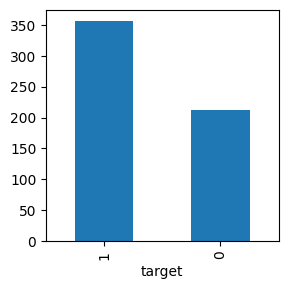

In [3]:
plt.figure(figsize=(3, 3))
df['target'].value_counts().plot(kind='bar')
plt.show()

It seems that the dataset is _almost_ balanced.  
We can split the dataset into training and testing sets straified by the target variable.  

##### Let's plot the correlation matrix to see the relationship between features.  

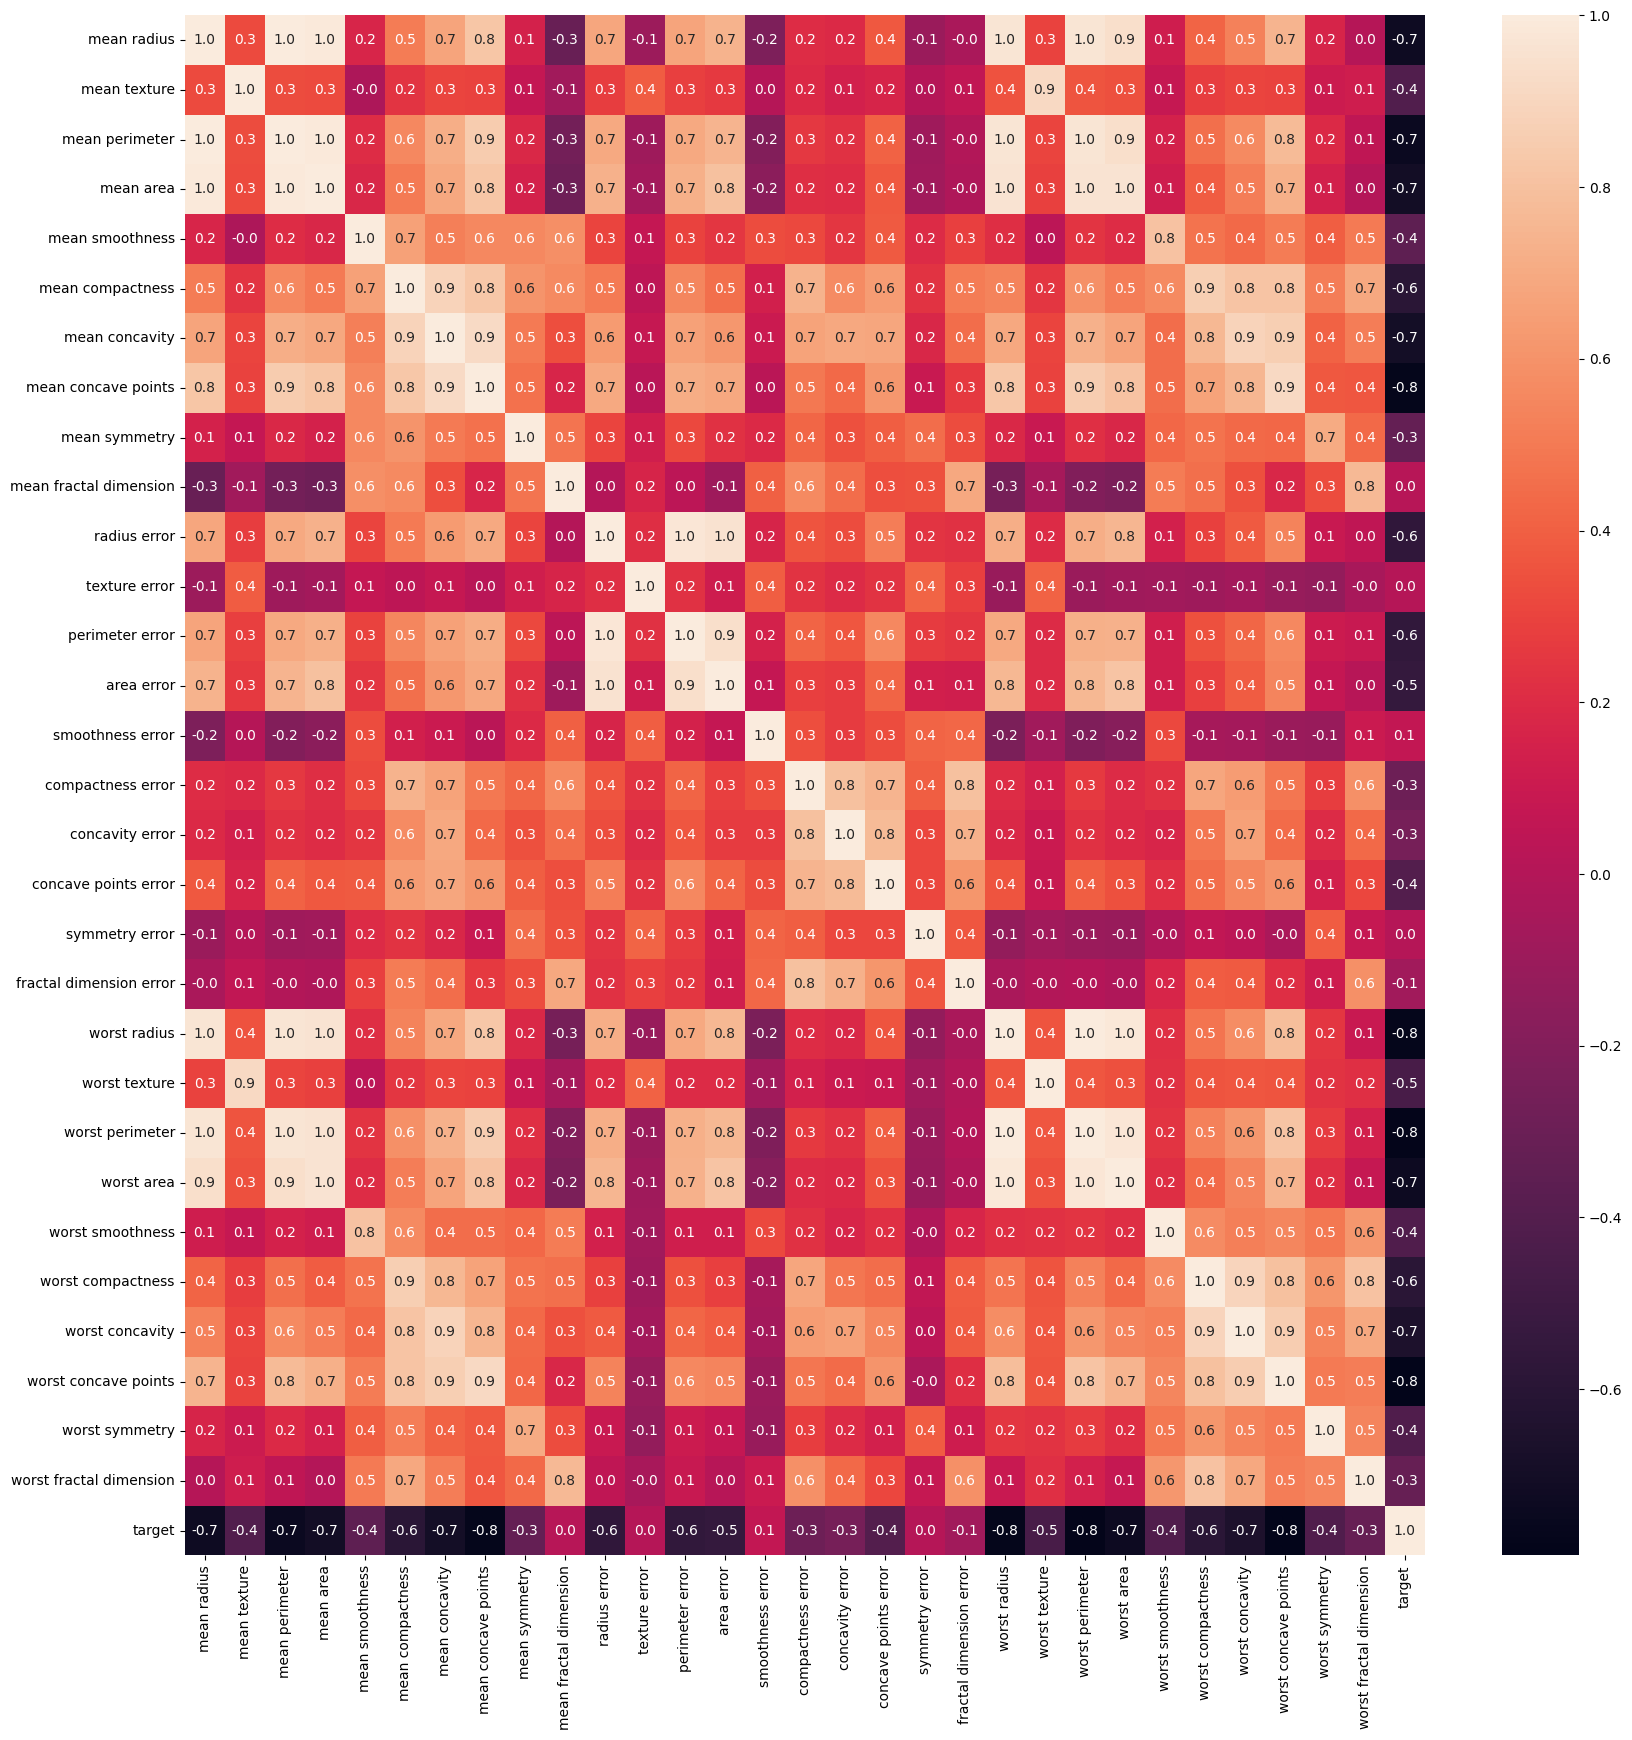

In [4]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt='.1f')
plt.show()

It seems that there are some features that are highly correlated with each other.  
We can use PCA to reduce the dimensionality of the dataset later if the model yields bad _recall_.  

#### Let's first _standardize_ our features:    

In [5]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, 
                                                    test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

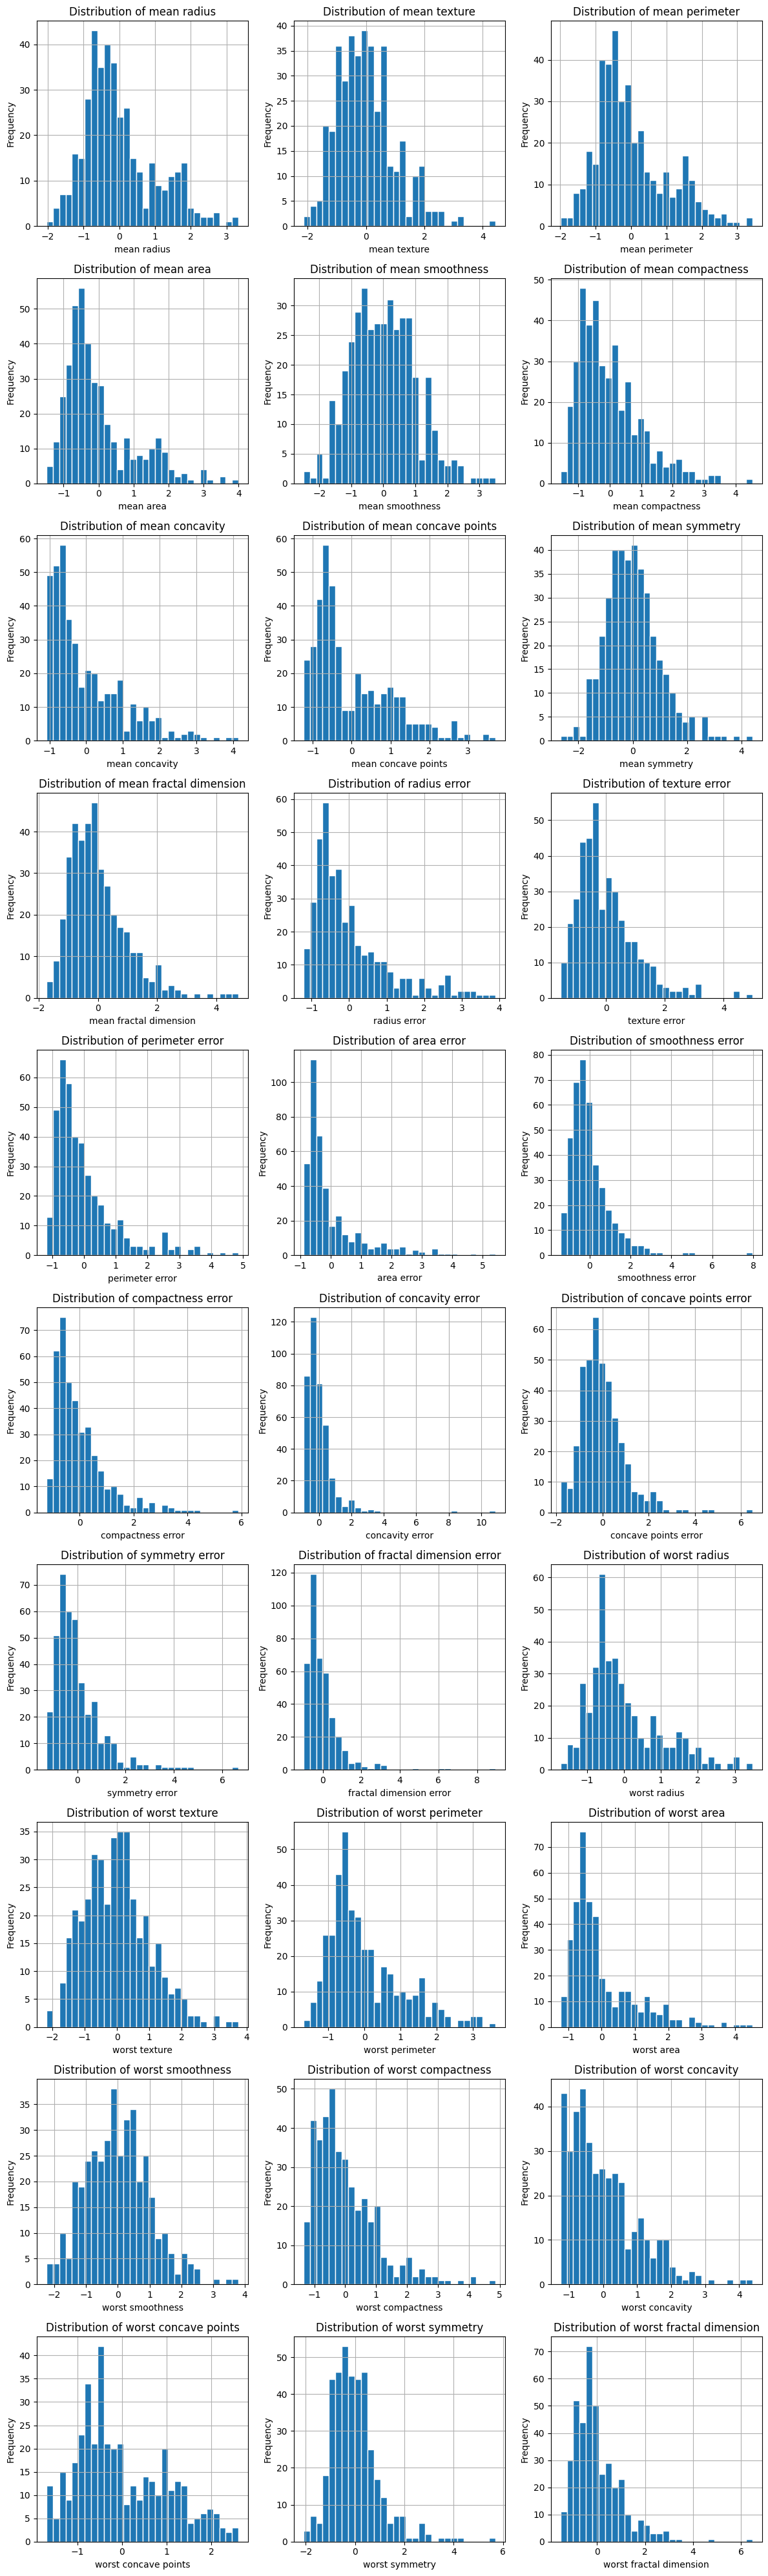

In [6]:
num_rows = ceil(len(X.columns) / 3)
fig, axes = plt.subplots(num_rows, 3, figsize=(3 * 4, num_rows * 4))
axes = axes.flatten()

for idx, column in enumerate(X.columns):
    ax = axes[idx]
    ax.hist(X_train[:, idx], bins=30, edgecolor='white')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(True)

for idx in range(len(X.columns), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

Now let's train the model using the `RandomForestClassifier` on our preprocessed data:  

In [7]:
model = RandomForestClassifier(n_estimators=50, max_depth=20, 
                               min_samples_leaf=2, min_samples_split=5, bootstrap=True)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        64
           1       0.95      0.97      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



#### Somwhat good results, let's see if the model is yeilding better results without standardizing the features:  

In [8]:
model = RandomForestClassifier(n_estimators=50, max_depth=20, min_samples_leaf=2, min_samples_split=5, bootstrap=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [9]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9707602339181286
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



##### A pretty good accuracy score as well as good **recall** values.  
Now let's _save_ the model: 

In [10]:
model_data = {"model": model}
dump(model_data, "Models/breast_classifier.pkl")

['Models/breast_classifier.pkl']

#### Now let's save a few samples for testing later:   

In [11]:
subset = X.sample(n=10, replace=False)

for i in range(subset.shape[0]):
    subset.iloc[i].to_csv(f"Test Samples/breast/sample_{i+1}.csv", index=False)

let's test the model on the saved samples:  

In [12]:
for i in range(subset.shape[0]):
    sample = pd.read_csv(f"Test Samples/breast/sample_{i+1}.csv")
    sample = sample.to_numpy().reshape(1, -1)

    print(f"Sample {i+1} predicted class: {model.predict(sample)[0]}")

Sample 1 predicted class: 1
Sample 2 predicted class: 1
Sample 3 predicted class: 0
Sample 4 predicted class: 0
Sample 5 predicted class: 1
Sample 6 predicted class: 0
Sample 7 predicted class: 1
Sample 8 predicted class: 0
Sample 9 predicted class: 1
Sample 10 predicted class: 0


#### It seems to be working correctly, than means our work here is finally done!  

### End of Notebook